# Data loader demo

In [1]:
import task3.utils.config
import task3.utils.utils
import task3.utils.img_utils
from loguru import logger
import importlib
import sys

## Initialize setup and get the data loader

In [2]:
importlib.reload(sys.modules['task3.utils.config'])
importlib.reload(sys.modules['task3.utils.utils'])
from task3.utils.config import get_data_loader, init

cfg = init(config='configs/default.yaml')

# you'd probably call this in train.py
training_loader, validation_loader, test_loader = get_data_loader(cfg, mode='train', get_subset=False)
submission_loader = get_data_loader(cfg, mode='submission', get_subset=False)

dict_keys(['name', 'video', 'box', 'label', 'frames', 'dataset', 'roi'])
2022-01-02T11:10:02.420576+0100 DEBUG Loaded samples: ['11NZLRCO13', 'QZA3WA0E2X', 'R82Q2AL9P7', '1XHV0Q88M5', 'E9AHVWGBUF', 'WO0OOZLXP6', 'ZMJIDN442P', 'OYZFKJR8U3', '3DGDHONGJW', 'YEZ7BPLZW0', 'W00G0Q112W', 'JANFS05F33', 'ONA22CCCFQ', 'EH667Z5JMT', '55M79ZANVX', 'H7G0BX4HFV', '571G03ZYDA', 'MHD497XXNA', 'TFDB2R0ZSA']
2022-01-02T11:10:09.609131+0100 DEBUG Exclude samples: None, include samples: None, applied transforms: functools.partial(<function functional_transforms at 0x18dec44c0>, cfg={'elastic_transform__alpha': 1.5, 'elastic_transform__sigma': 0.08, 'elastic_transform__alpha_affine': 0.08, 'elastic_transform__p': 0.8, 'random_affine__translate': [0.1, 0.1], 'random_affine__scale': 1.2, 'random_perspective__distortion_scale': 0.1, 'color_jitter__brightness': 0.1, 'color_jitter__contrast': 0.1, 'color_jitter__saturation': 0.1})
2022-01-02T11:10:09.609799+0100 DEBUG Dataset creation: train
2022-01-02T11:10:09

## Visualize data

In [3]:
# Get and visualize a batch of training data
train_batch = next(iter(training_loader))
val_batch = next(iter(validation_loader))
test_batch = next(iter(test_loader)) if test_loader is not None else None
submission_batch = next(iter(submission_loader))

batches = {
    'val': val_batch,
    'test': test_batch,
    'submission': submission_batch,
}

2022-01-02T11:11:39.780181+0100 DEBUG "train" batch keys: dict_keys(['id', 'name', 'frame_cropped', 'orig_frame_dims', 'frame_orig', 'dataset', 'box_mask_props', 'label_cropped'])
2022-01-02T11:11:39.782979+0100 DEBUG Shape of batch frames: torch.Size([8, 1, 224, 224]); shape of batch labels torch.Size([8, 1, 224, 224])


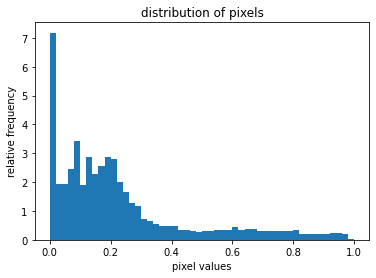

2022-01-02T11:11:39.969361+0100 DEBUG {'top_left': (291, 482), 'bottom_right': (473, 664), 'box_dims': (182, 182), 'h_to_w_ratio': tensor(1., dtype=torch.float64), 'center': (382, 573), 'mask_dims': (750, 1020)}
2022-01-02T11:11:39.975132+0100 DEBUG original frame dims (732, 1007)
2022-01-02T11:11:39.982999+0100 DEBUG {'top_left': (290, 419), 'bottom_right': (521, 650), 'box_dims': (231, 231), 'h_to_w_ratio': tensor(1., dtype=torch.float64), 'center': (406, 535), 'mask_dims': (750, 1020)}
2022-01-02T11:11:39.983818+0100 DEBUG original frame dims (732, 1007)
2022-01-02T11:11:39.989563+0100 DEBUG {'top_left': (278, 541), 'bottom_right': (469, 732), 'box_dims': (191, 191), 'h_to_w_ratio': tensor(1., dtype=torch.float64), 'center': (374, 637), 'mask_dims': (750, 1020)}
2022-01-02T11:11:39.990228+0100 DEBUG original frame dims (732, 1007)
2022-01-02T11:11:39.995527+0100 DEBUG {'top_left': (290, 419), 'bottom_right': (521, 650), 'box_dims': (231, 231), 'h_to_w_ratio': tensor(1., dtype=torch.

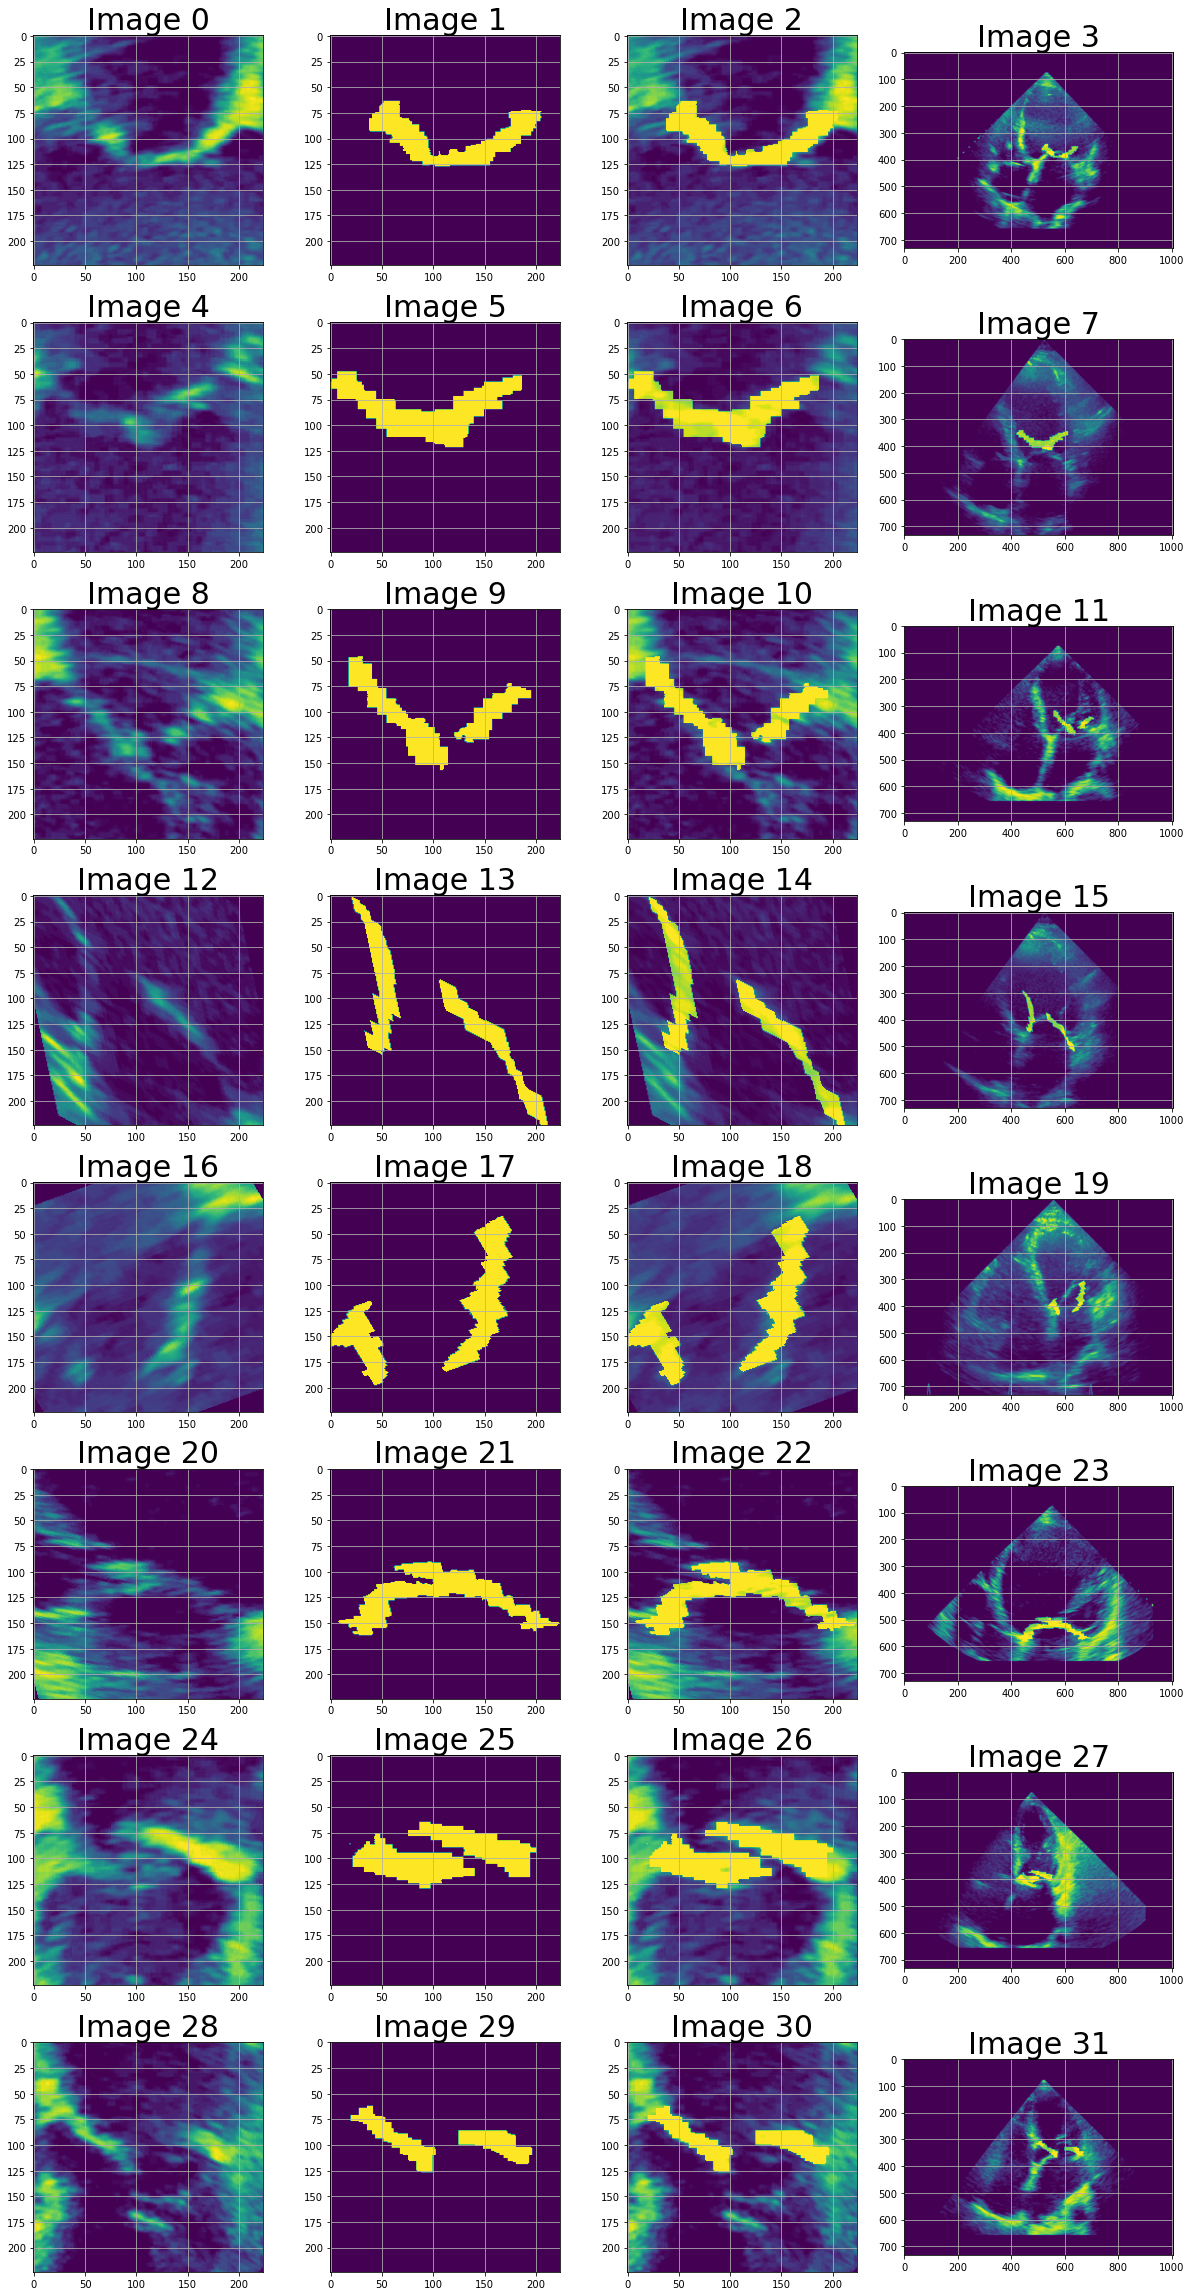

2022-01-02T11:11:42.511049+0100 DEBUG "val" batch keys: dict_keys(['id', 'name', 'frame_cropped', 'orig_frame_dims', 'frame_orig', 'dataset', 'box_mask_props', 'label_cropped'])
2022-01-02T11:11:42.515061+0100 DEBUG Shape of batch frames: torch.Size([8, 1, 224, 224]); shape of batch labels torch.Size([8, 1, 224, 224])


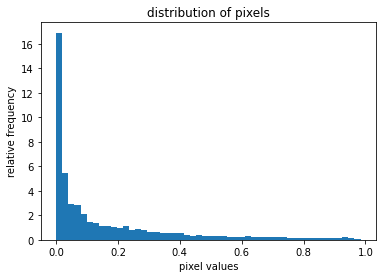

2022-01-02T11:11:42.614979+0100 DEBUG {'top_left': (280, 427), 'bottom_right': (452, 599), 'box_dims': (172, 172), 'h_to_w_ratio': tensor(1., dtype=torch.float64), 'center': (366, 513), 'mask_dims': (750, 1020)}
2022-01-02T11:11:42.615708+0100 DEBUG original frame dims (732, 1007)
2022-01-02T11:11:42.620076+0100 DEBUG {'top_left': (291, 482), 'bottom_right': (473, 664), 'box_dims': (182, 182), 'h_to_w_ratio': tensor(1., dtype=torch.float64), 'center': (382, 573), 'mask_dims': (750, 1020)}
2022-01-02T11:11:42.620837+0100 DEBUG original frame dims (732, 1007)
2022-01-02T11:11:42.627021+0100 DEBUG {'top_left': (242, 473), 'bottom_right': (465, 696), 'box_dims': (223, 223), 'h_to_w_ratio': tensor(1., dtype=torch.float64), 'center': (354, 585), 'mask_dims': (750, 1020)}
2022-01-02T11:11:42.627745+0100 DEBUG original frame dims (732, 1007)
2022-01-02T11:11:42.631613+0100 DEBUG {'top_left': (406, 412), 'bottom_right': (675, 681), 'box_dims': (269, 269), 'h_to_w_ratio': tensor(1., dtype=torch.

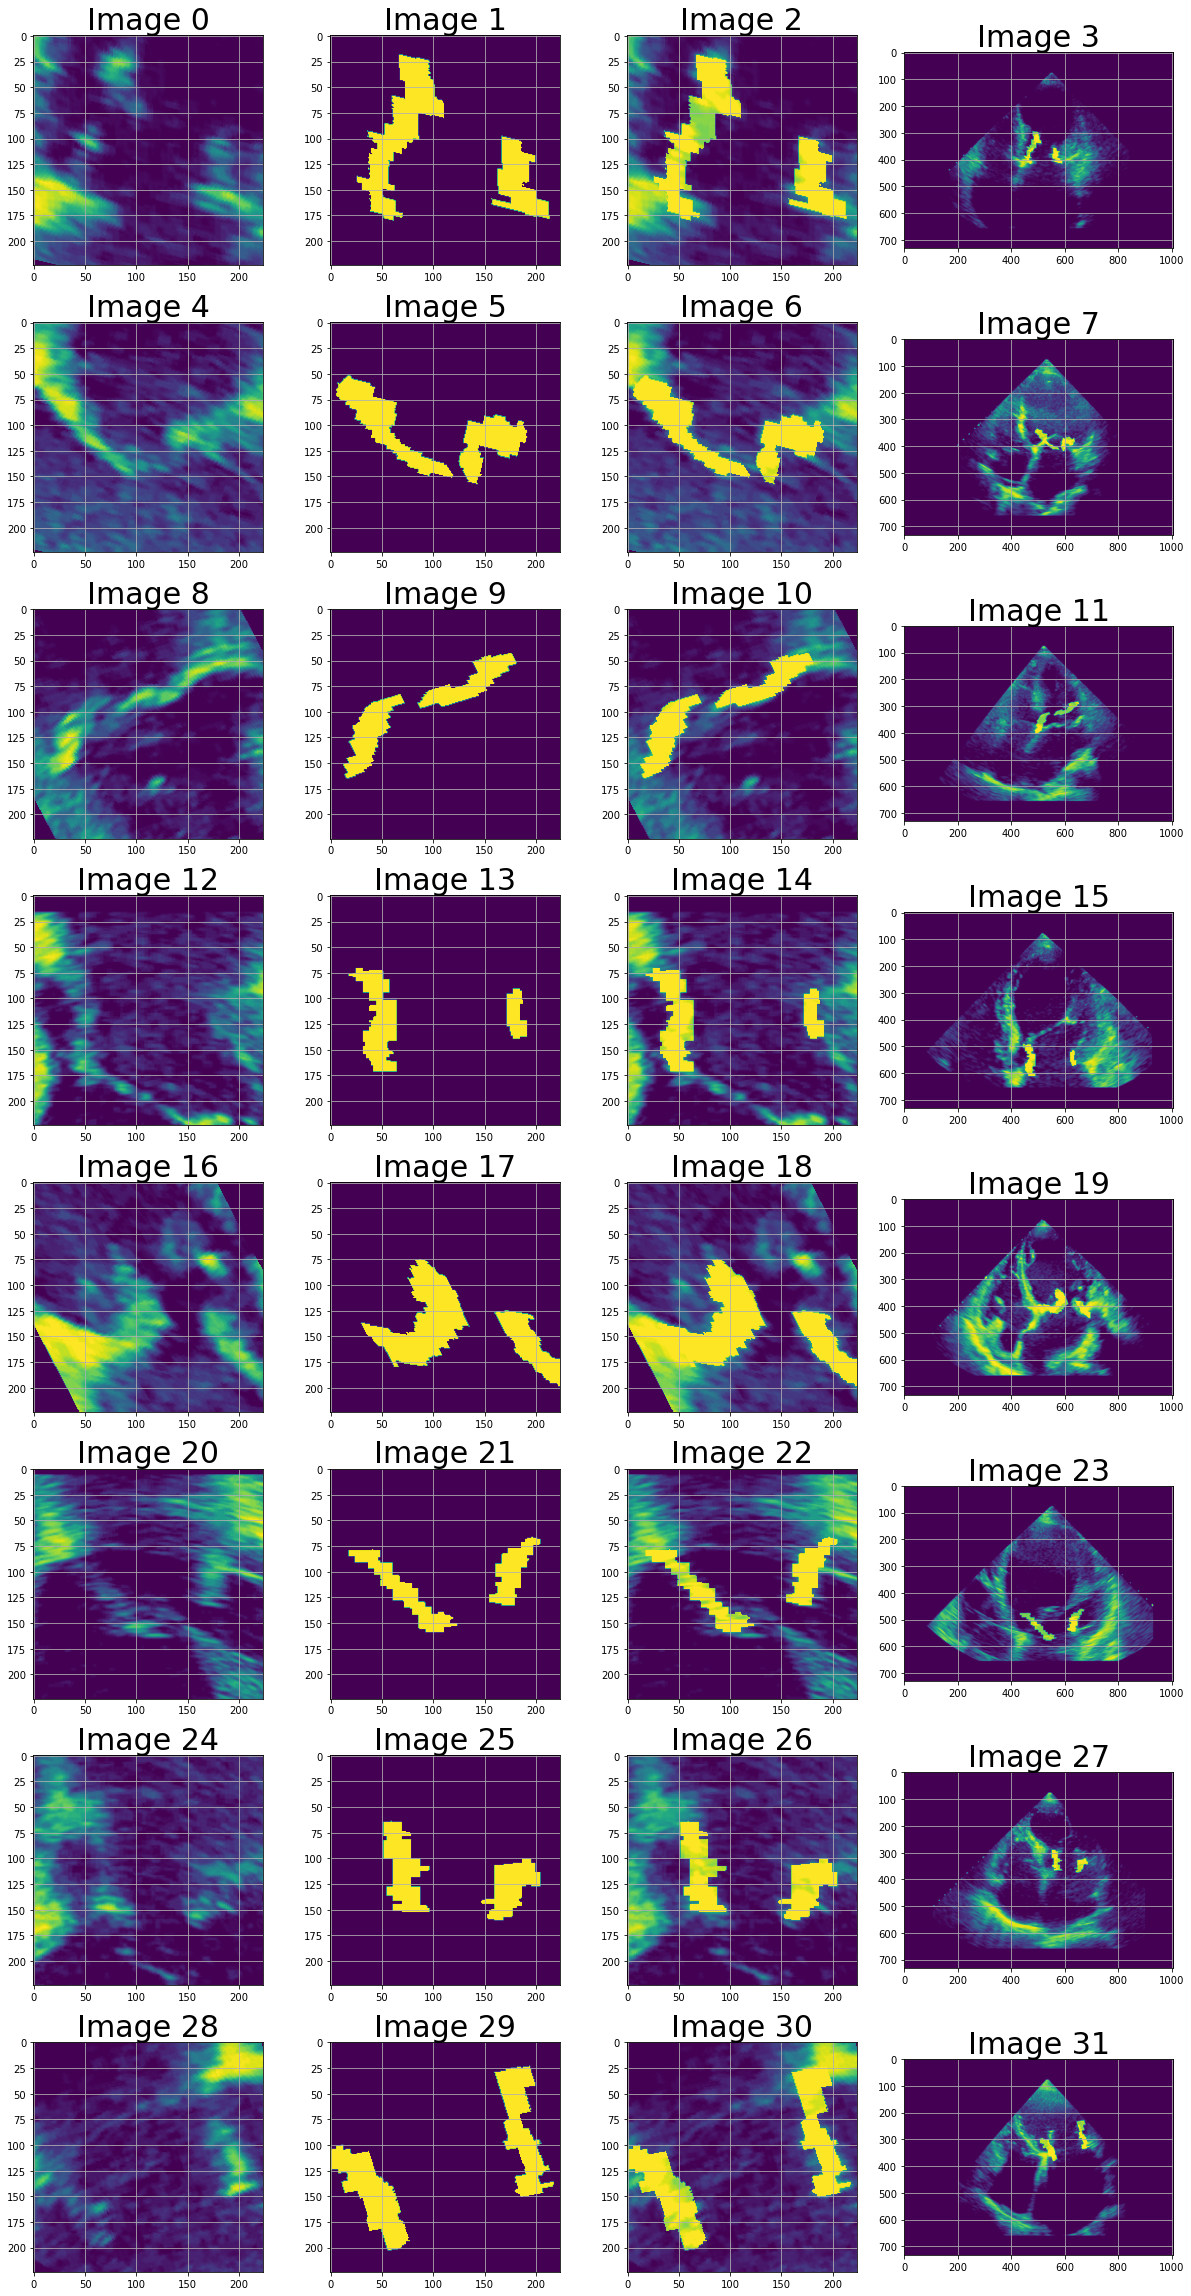

2022-01-02T11:11:45.034040+0100 INFO "test" batch empty or invalid, skipping visualizaton
2022-01-02T11:11:45.034434+0100 DEBUG "submission" batch keys: dict_keys(['id', 'name', 'frame_cropped', 'orig_frame_dims', 'frame_orig'])
2022-01-02T11:11:45.034727+0100 DEBUG Shape of batch frames: torch.Size([1, 1, 224, 224]); shape of batch labels None


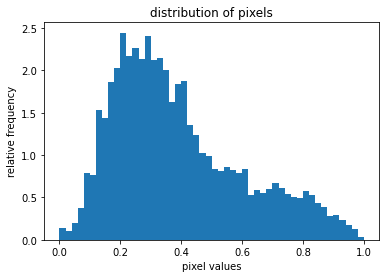

2022-01-02T11:11:45.192068+0100 DEBUG {}
2022-01-02T11:11:45.192391+0100 DEBUG original frame dims (732, 1007)


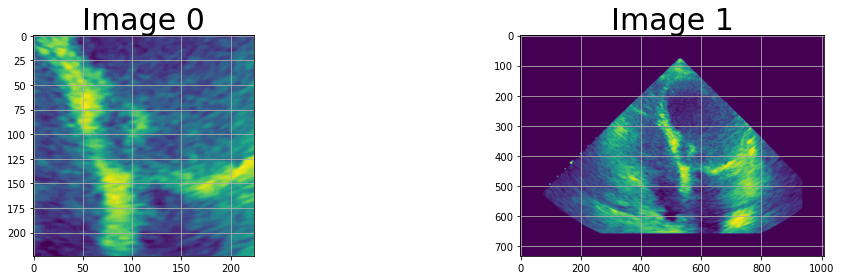

In [4]:
importlib.reload(sys.modules['task3.utils.img_utils'])
from task3.utils.img_utils import show_img_batch

for name, batch in batches.items():
    if type(batch) is dict:
        logger.debug('"{}" batch keys: {}', name, batch.keys())
        show_img_batch(batch)
    else:
        logger.info('"{}" batch empty or invalid, skipping visualizaton', name)